In [161]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import pandas as pd

from sklearn.datasets import load_iris, load_wine

import lib.baseline as baseline
import lib.util as util
from lib.baycon import baycon_explainer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [175]:
X, true_y = load_wine(return_X_y=True)
km = KMeans(n_clusters=3)
y = km.fit_predict(X)

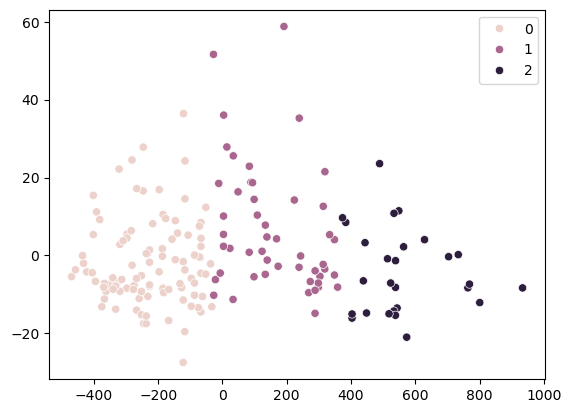

In [176]:
# X, y = make_blobs(centers=3, cluster_std=12, n_features=20, n_samples=1000)
eX = PCA(n_components=2).fit_transform(X)
sns.scatterplot(x=eX[:, 0], y=eX[:, 1], hue=y)
plt.show()

In [164]:
idx = 0
print(f"init point cluster: {y[idx]}")
target_cluster = 2

init point cluster: 1


In [181]:
explainer = baycon_explainer
# classifier = MLPClassifier(hidden_layer_sizes=(6,4))
# classifier = LogisticRegression()
classifier = RandomForestClassifier(n_estimators=100)
cf = baseline.baseline_explainer(X, y, classifier, explainer, idx, target_cluster=target_cluster, binary=True)

Done training classifier. Score: 1.0
--- Executing... Initial Instance: 0 Target: 2 Run: 0 ---
--- Step 0: Load internal objects ---
--- Step 1: Generate initial neighbours ---
Generated initial neighbours: (609) CFs (15)
Re-training surrogate model with data size: 609
--- Step 2: Explore neighbourhood ---
--- epoch 1 ----
Generating neighbors for 1 near best instances
Generated neighbours: (1) Unique overall (1)
Generated random instances: (2627)
Predicted top: 20 Counterfactuals: 20
Known alternatives: 629
Best instance score 0.9176 (X 0.99404 Y 1.0 F 0.92308), found on epoch: 0
Re-training surrogate model with data size: 629
--- epoch 2 ----
Generating neighbors for 20 near best instances
Generated neighbours: (23) Unique overall (23)
Generated random instances: (2628)
Predicted top: 20 Counterfactuals: 20
Known alternatives: 649
Best instance score 0.9176 (X 0.99404 Y 1.0 F 0.92308), found on epoch: 0
Re-training surrogate model with data size: 649
--- epoch 3 ----
Generating neigh

Data has more than 2 features. Using PCA!


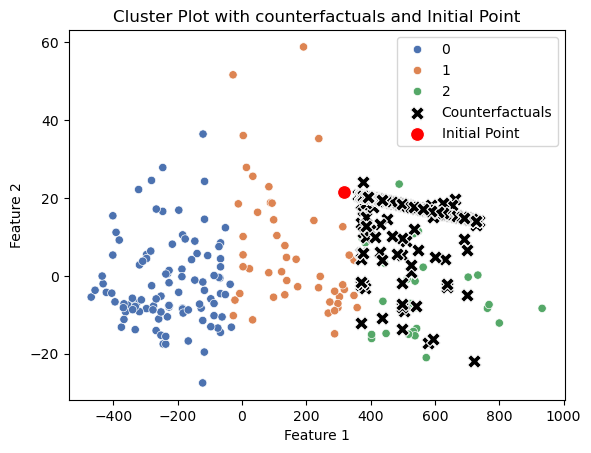

In [182]:
util.plot_cluster_cf(X, y, cf, idx)